# Exercise1

This is the first exercise for your **Digital Image Processing** course. After fininshing this exercise you are expected to know:
- How to work with images in OpenCV.
- How to perform image zooming.
- How to enhance the contrast of images through various methods.
- How to apply different operations on pixel values in order to modify images.


# Instructions

- Please provide a proper answer for each part of the questions.
- Use the cells beneath each question for your answer.
- Feel free to add more cells whenever needed.

Good luck!

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings

warnings.filterwarnings("ignore")

## Helper functions

In [2]:
def plot_fig(figsize: tuple[int, int], rows: int, cols: int, data_list: tuple, title_list: tuple[str], plot_type_list: tuple[str]) -> None:
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    if rows == 1:
        for i in range(cols):
            if plot_type_list[i] == 'imshow':
                ax[i].imshow(X=data_list[i], cmap='gray', vmin=0, vmax=255)
            elif plot_type_list[i] == 'hist':
                ax[i].hist(data_list[i].ravel(), bins=256, range=[0,256])
            elif plot_type_list[i] == 'plot':
                ax[i].plot(data_list[i])
            ax[i].set_title(title_list[i])
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j+1 > len(data_list):
                    break

                if plot_type_list[i*cols+j] == 'imshow':
                    ax[i, j].imshow(X=data_list[i*cols+j], cmap='gray', vmin=0, vmax=255)
                elif plot_type_list[i*cols+j] == 'hist':
                    ax[i, j].hist(data_list[i*cols+j].ravel(), bins=256, range=[0,256])
                elif plot_type_list[i*cols+j] == 'plot':
                    ax[i, j].plot(data_list[i*cols+j])
                ax[i, j].set_title(title_list[i*cols+j])
    plt.show()

## Question 1 (15 points)

In computer vision, image zooming is a process that enlarges or reduces an image while preserving or altering its details.

You are provided with an image *einstein.jpg*, and your task is to apply zooming with a factor of 2 using the following two methods: **Pixel replication** and **Zero-order hold**.


**A)** Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.

**B)** Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

**C)** For each of the two methods, discuss their advantages and disadvantages. Consider aspects such as image quality, computational complexity, and suitability for different types of images.

**D)** Display the zoomed images for the two methods and report the results. Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

**E)** Suggest an improved zooming method and compare its results with the two experimented methods.

You can see the original form of the image below

<img src="einstein.jpg"/>

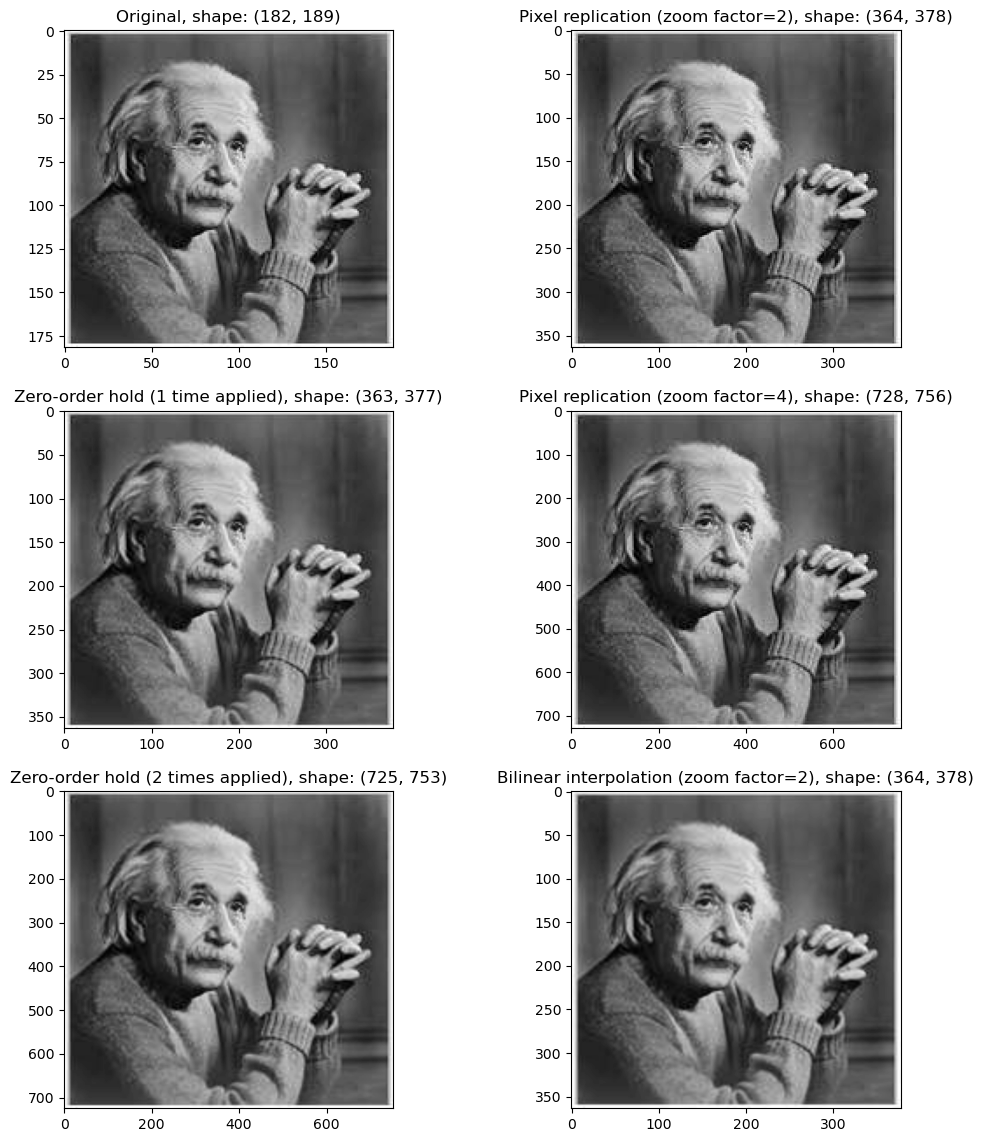

In [3]:
def pixel_replication(image: np.ndarray, zooming_factor: int) -> np.ndarray:
    zoomed_image = cv2.resize(src=q1_image, dsize=None, fx=zooming_factor, fy=zooming_factor, interpolation=cv2.INTER_NEAREST)
    return zoomed_image

def zero_order_hold(image: np.ndarray, zoom_operation_count: int) -> np.ndarray:
    for _ in range(zoom_operation_count):
        zoomed_image = np.zeros((image.shape[0], 2*image.shape[1]-1), dtype=np.uint16)
        for i in range(image.shape[1]):
            zoomed_image[:, 2*i] = image[:, i]
            if i != image.shape[1]-1:
                zoomed_image[:, 2*i+1] = np.floor((image[:, i] + image[:, i+1]) / 2)

        zoomed_image2 = np.zeros((2*image.shape[0]-1, 2*image.shape[1]-1), dtype=np.uint16)
        for i in range(zoomed_image.shape[0]):
            zoomed_image2[2*i, :] = zoomed_image[i, :]
            if i != zoomed_image.shape[0]-1:
                zoomed_image2[2*i+1, :] = np.floor((zoomed_image[i, :] + zoomed_image[i+1, :]) / 2)
        image = zoomed_image2
    return zoomed_image2

def bilinear_interpolation(image: np.ndarray, zooming_factor: int) -> np.ndarray:
    zoomed_image = cv2.resize(src=q1_image, dsize=None, fx=zooming_factor, fy=zooming_factor, interpolation=cv2.INTER_LINEAR)
    return zoomed_image

q1_image = cv2.imread(filename='einstein.jpg', flags=cv2.IMREAD_GRAYSCALE).astype(np.uint16)
pixel_replication_output1 = pixel_replication(image=q1_image, zooming_factor=2)
zero_order_hold_output1 = zero_order_hold(image=q1_image, zoom_operation_count=1)
pixel_replication_output2 = pixel_replication(image=q1_image, zooming_factor=4)
zero_order_hold_output2 = zero_order_hold(image=q1_image, zoom_operation_count=2)
bilinear_interpolation_output = bilinear_interpolation(image=q1_image, zooming_factor=2)
plot_fig(
    figsize=(12, 14), 
    rows=3, 
    cols=2, 
    data_list=(q1_image, pixel_replication_output1, zero_order_hold_output1, pixel_replication_output2, zero_order_hold_output2, bilinear_interpolation_output), 
    title_list=(f'Original, shape: {q1_image.shape}', f'Pixel replication (zoom factor=2), shape: {pixel_replication_output1.shape}', f'Zero-order hold (1 time applied), shape: {zero_order_hold_output1.shape}', f'Pixel replication (zoom factor=4), shape: {pixel_replication_output2.shape}', f'Zero-order hold (2 times applied), shape: {zero_order_hold_output2.shape}', f'Bilinear interpolation (zoom factor=2), shape: {bilinear_interpolation_output.shape}'), 
    plot_type_list=('imshow',)*6
)

## Question 2 (15 points)

You are given a low-contrast grayscale image, 'low_contrast.jpg', which has lost significant details due to insufficient contrast. Your task is to enhance the image using logarithmic and gamma correction techniques. Additionally, you need to plot the histograms of the original and enhanced images for comparison.

<img src="low_contrast.jpg" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching.

**C)** Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula:

enhanced_pixel_value = c * log(1 + original_pixel_value)

Choose an appropriate constant 'c' to scale the enhanced pixel values to the range (0 to 1).

**D)** Apply gamma correction to 'low_contrast.jpg'.
Choose a suitable 'gamma' value for enhancing the image's contrast.

**E)** After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.

*X-axis:* Pixel intensity values (0 to 1)  
*Y-axis:* Frequency of each intensity value in the image

### Gamma correction

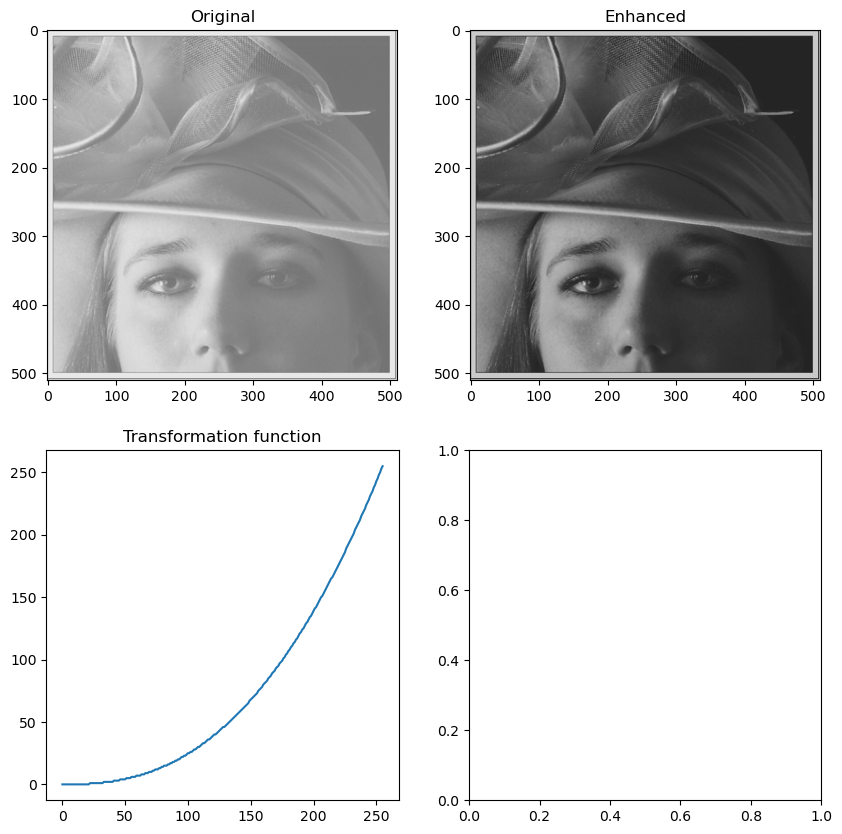

In [4]:
def gamma_correction_with_lookup_table(image: np.ndarray, gamma: float) -> tuple[np.ndarray, np.ndarray]:
    """
    This implementation of gamma correction doesn't require to normalize the image directly,
    it creates a lookup table that will map each pixel to a value between 0 to 255.
    """
    lookup_table = np.round(np.power(np.arange(256) / 255, gamma) * 255).astype(np.uint8)
    output_image = cv2.LUT(image, lookup_table)
    return output_image, lookup_table

q2_image = cv2.imread(filename='low_contrast.jpg', flags=cv2.IMREAD_GRAYSCALE)
# The original image is bright, so we have to choose a gamma greater than 1 to make it darker
output_image1, transformation_function1 = gamma_correction_with_lookup_table(image=q2_image, gamma=2.5)
plot_fig(
    figsize=(10, 10), 
    rows=2, 
    cols=2, 
    data_list=(q2_image, output_image1, transformation_function1), 
    title_list=("Original", 'Enhanced', 'Transformation function'), 
    plot_type_list=('imshow', 'imshow', 'plot')
) 

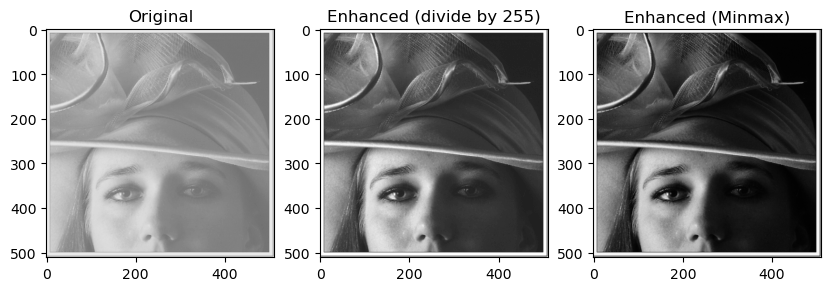

In [5]:
def gamma_correction_without_lookup_table(image: np.ndarray, gamma: float, r1: float, r2: float, normalization_method: str = None) -> np.ndarray:
    """
    Different methods of normalization lead to different results,
    two different methods are implemented here
    """
    # if we divide the image's pixels by 255 the output will be exactly like 
    # the output of 'gamma_correction_with_lookup_table' function but different  
    # to the case that we do minmax normalization, because the maximum pixel in
    # the image is not 255
    if normalization_method == 'minmax':
        output_image = cv2.normalize(src=image, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    else:
        output_image = image / 255
    output_image[output_image < r1] = 0
    output_image[output_image > r2] = 1
    output_image[(output_image >= r1) & (output_image <= r2)] = np.power((output_image[(output_image >= r1) & (output_image <= r2)]-r1) / (r2-r1), gamma)
    if normalization_method == 'minmax':
        output_image = cv2.normalize(src=output_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        output_image = np.round(output_image * 255).astype(np.uint8)
    return output_image

# The original image is bright, so we have to choose a gamma greater than 1 to make it darker
output_image2 = gamma_correction_without_lookup_table(image=q2_image, gamma=2.5, r1=0.1, r2=0.9)
output_image3 = gamma_correction_without_lookup_table(image=q2_image, gamma=1.5, r1=0.1, r2=0.9, normalization_method='minmax')
plot_fig(
    figsize=(10, 10), 
    rows=1, 
    cols=3, 
    data_list=(q2_image, output_image2, output_image3), 
    title_list=("Original", 'Enhanced (divide by 255)', 'Enhanced (Minmax)'), 
    plot_type_list=('imshow', 'imshow', 'imshow')
) 

### Logarithmic correction

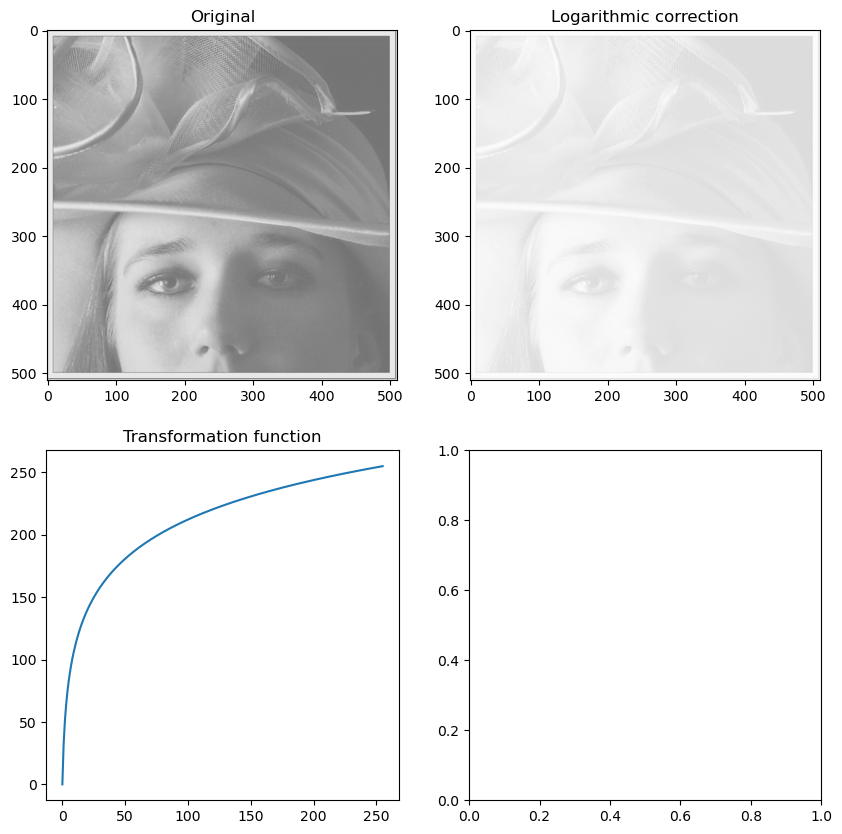

In [6]:
def logarithmic_correction(image: np.ndarray):
    c = 255 / (np.log10(1 + np.max(image)))
    output_image = np.round(c * np.log10(image+1)).astype(np.uint8)
    return output_image

output_image4 = logarithmic_correction(image=q2_image)
transformation_function2 = (255 / (np.log10(1 + 255))) * np.log10(np.arange(256)+1)
plot_fig(
    figsize=(10, 10), 
    rows=2, 
    cols=2, 
    data_list=(q2_image, output_image4, transformation_function2), 
    title_list=("Original", 'Logarithmic correction', 'Transformation function'), 
    plot_type_list=('imshow', 'imshow', 'plot')
) 

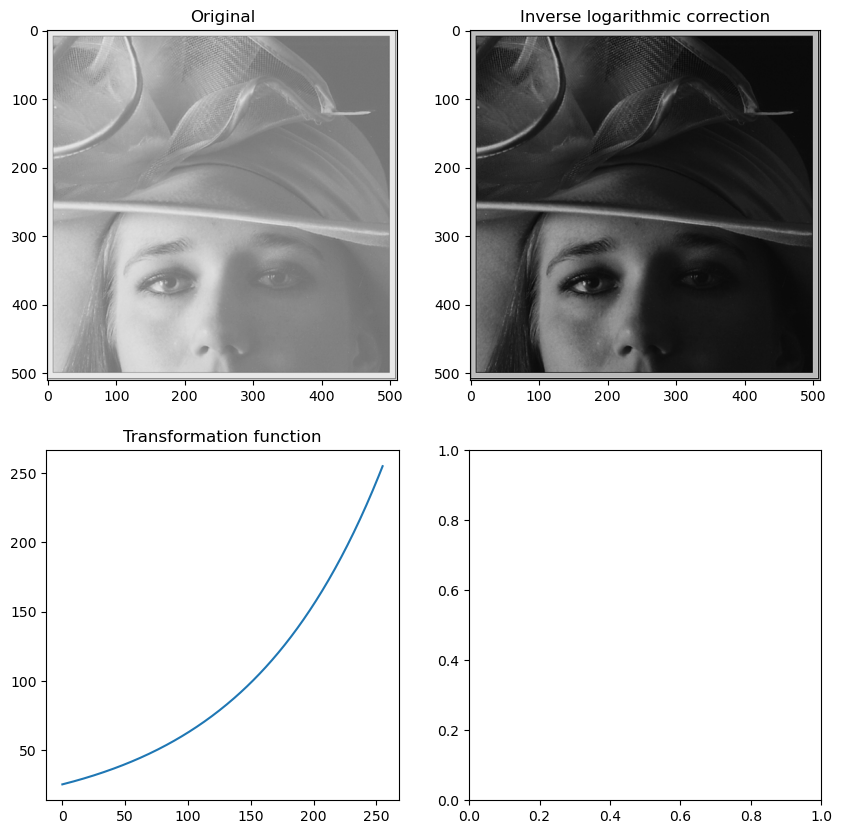

In [7]:
def inverse_logarithmic_correction(image: np.ndarray):
    output_image = cv2.normalize(src=image, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # image = image / 255
    output_image = (10**output_image).astype(np.float32)
    output_image = cv2.normalize(src=output_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return output_image

output_image5 = inverse_logarithmic_correction(image=q2_image)
transformation_function3 = (10**(np.arange(256)/255)) * 255/10
plot_fig(
    figsize=(10, 10), 
    rows=2, 
    cols=2, 
    data_list=(q2_image, output_image5, transformation_function3), 
    title_list=("Original", 'Inverse logarithmic correction', 'Transformation function'), 
    plot_type_list=('imshow', 'imshow', 'plot')
)

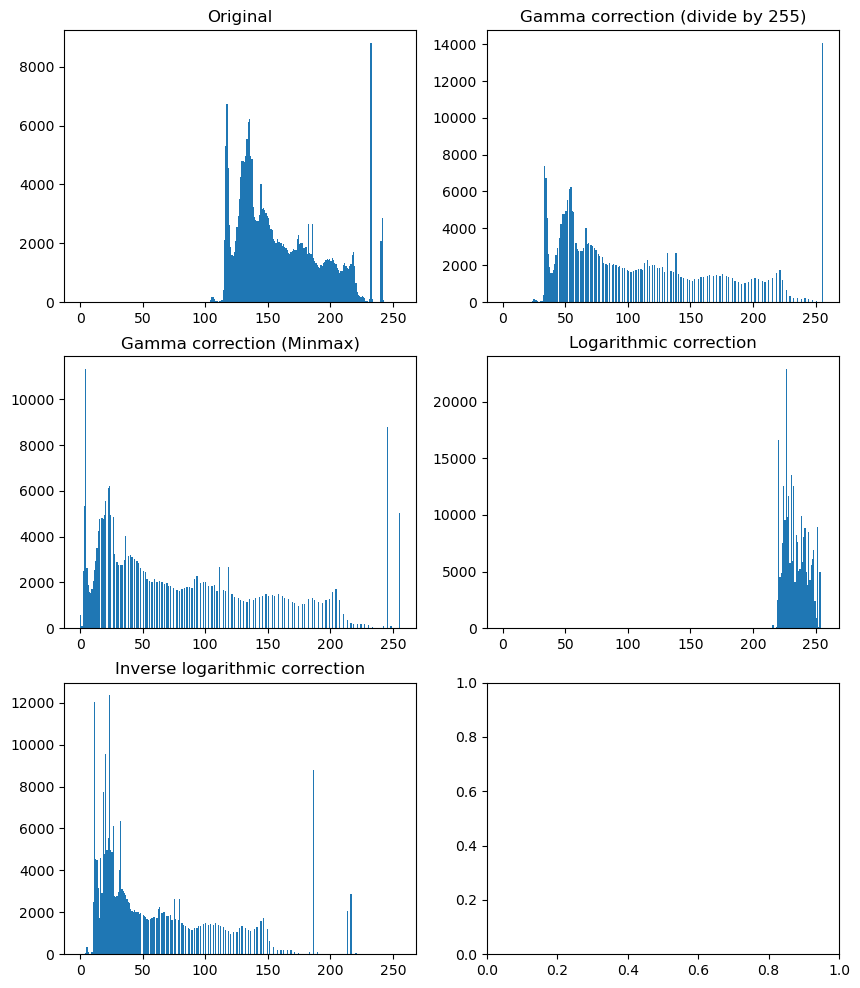

In [8]:
plot_fig(
    figsize=(10, 12), 
    rows=3, 
    cols=2, 
    data_list=(q2_image, output_image2, output_image3, output_image4, output_image5), 
    title_list=("Original", 'Gamma correction (divide by 255)', 'Gamma correction (Minmax)', 'Logarithmic correction', 'Inverse logarithmic correction'), 
    plot_type_list=('hist',)*5
)

## Question 3 (15 points)

Histogram equalization is a technique widely used in image processing to enhance the contrast of an image by redistributing the intensity values. In this question, you will explore the concept of histogram equalization step by step. Use the image below for this question.

<img src="lena_gray.gif" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Calculate and plot the histogram of the original image. Analyze the histogram to understand the distribution of pixel intensities.

**C)** Implement the histogram equalization algorithm on the original image then calculate and plot the histogram of the equalized image.

**D)** Display the original image, the histogram-equalized image, and their respective histograms side by side for comparison.

**E)** Analyze and compare the visual differences between the original and equalized image. Discuss how histogram equalization has affected the distribution of pixel intensities.

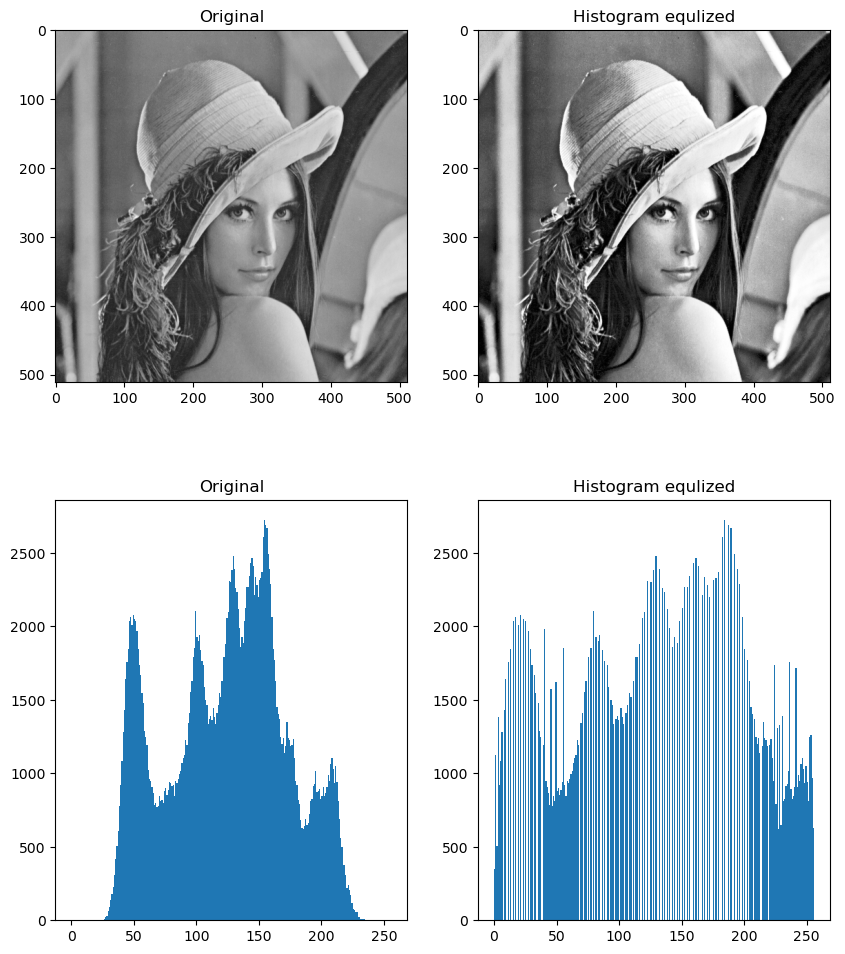

In [9]:
q3_image = cv2.VideoCapture("lena_gray.gif").read()[1][:, :, 0]
equlized_image = cv2.equalizeHist(q3_image)
plot_fig(
    figsize=(10, 12), 
    rows=2, 
    cols=2, 
    data_list=(q3_image, equlized_image, q3_image, equlized_image), 
    title_list=("Original", 'Histogram equlized')*2, 
    plot_type_list=('imshow', 'imshow', 'hist', 'hist')
)

## Question 4 (15 points)

The image square.gif contains two square objects. Pixels in the first square have the intensity 
of 150 while those in the second square have the intensity of 220. Read the image and do the following: 

**A)**  The small square is to be translated by 40 pixels in both directions. 

**B)**  The large square is to be rotated by 60 degrees counter clockwise. 

Write the code to perform these transformations. Show the image before and after transformation on the 
same figure.

you can see the original form of the image below:

<img src="square.gif" width="200" height="200"/>

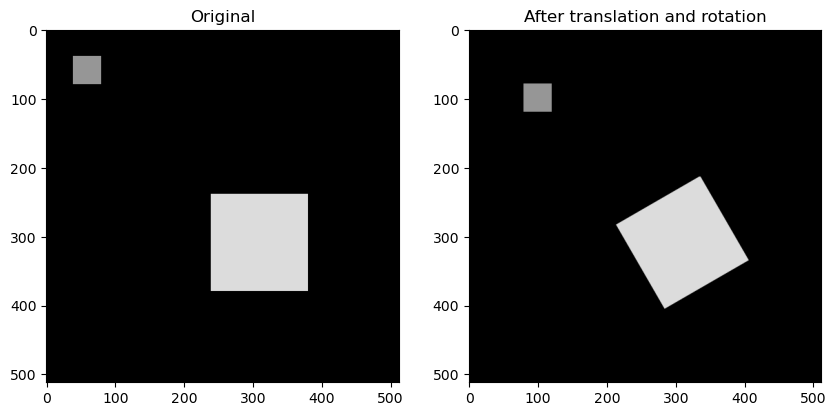

In [10]:
def translate_small_square(image: np.ndarray, tx: int, ty: int) -> np.ndarray:
    M = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
    translated_image = cv2.warpAffine(src=image, M=M, dsize=image.shape)
    temp = np.where(image == 150)[0]
    x = temp.min()
    h = temp.max() - temp.min()
    translated_image = np.concatenate((translated_image[:x+h+tx+1], translated_image[x+h+tx+1:]), axis=0)
    return translated_image

def rotate_big_square(image: np.ndarray, theta: float) -> np.ndarray:
    temp1 = np.where(image == 220)[0]
    cx = int((temp1.max() + temp1.min()) // 2)
    temp2 = np.where(image == 220)[1]
    cy = int((temp2.max() + temp2.min()) // 2)
    M = cv2.getRotationMatrix2D((cx, cy), theta, 1.0)
    rotated_image = cv2.warpAffine(src=image, M=M, dsize=image.shape)
    x = np.where(rotated_image == 220)[0].min()
    rotated_image = np.concatenate((image[:x], rotated_image[x:]), axis=0)
    return rotated_image

q4_image = cv2.VideoCapture('square.gif').read()[1][:, :, 0]
translated_image = translate_small_square(image=q4_image, tx=40, ty=40)
rotated_image = rotate_big_square(image=q4_image, theta=-60)
x = np.where(rotated_image == 220)[0].min()
output_image6 = np.concatenate((translated_image[:x], rotated_image[x:]), axis=0)
plot_fig(
    figsize=(10, 10), 
    rows=1, 
    cols=2, 
    data_list=(q4_image, output_image6), 
    title_list=("Original", "After translation and rotation"), 
    plot_type_list=('imshow', 'imshow')
)

## Question 5 (10 points)

For the image skeleton.gif, try to modify the normalized image using the following functions: 

<img src="functions.png" width="500" height="250"/>

Show the results in each case. Which function produces the best result in your opinion? Discuss your 
results.

You can see the original form of the image below:

<img src="skeleton.gif" width="200" height="200"/>

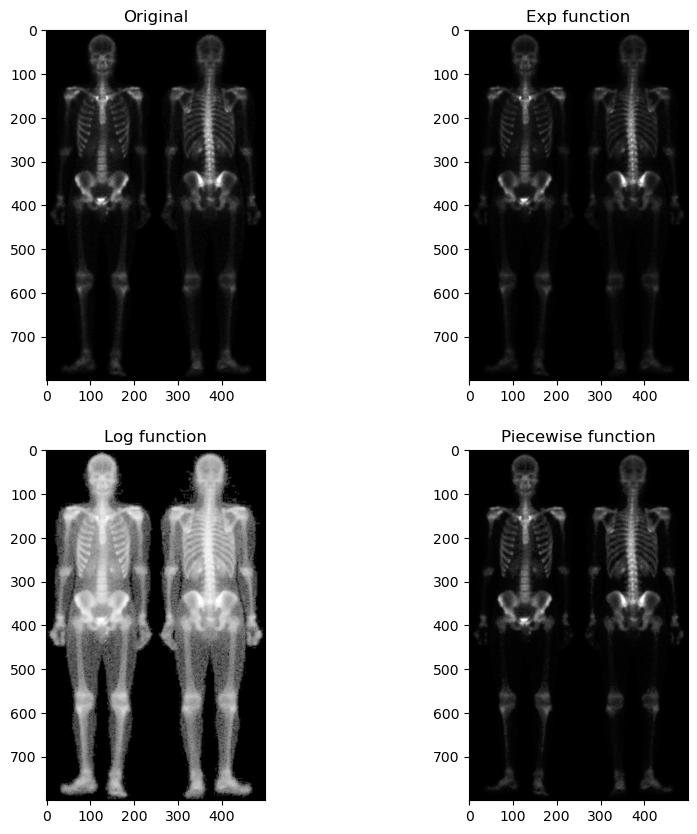

In [11]:
def exp_function(image: np.ndarray, c: float) -> np.ndarray:
    output_image = cv2.normalize(src=image, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    output_image = np.exp(c * output_image)
    output_image = cv2.normalize(src=output_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return output_image

def log_function(image: np.ndarray) -> np.ndarray:
    c = 255 / np.log10(1 + np.max(image))
    output_image = c * np.log10(image + 1)
    return output_image

def piecewise_function(image: np.ndarray) -> np.ndarray:
    output_image = cv2.normalize(src=image, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    output_image[output_image >= 0.1] *= 2 
    output_image = cv2.normalize(src=output_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return output_image

q5_image = cv2.VideoCapture('skeleton.gif').read()[1][:, :, 0]
output_image7 = exp_function(image=q5_image, c=1)
output_image8 = log_function(image=q5_image)
output_image9 = piecewise_function(image=q5_image)
plot_fig(
    figsize=(10, 10), 
    rows=2, 
    cols=2, 
    data_list=(q5_image, output_image7, output_image8, output_image9), 
    title_list=("Original", 'Exp function', 'Log function', 'Piecewise function'), 
    plot_type_list=('imshow',)*4
)

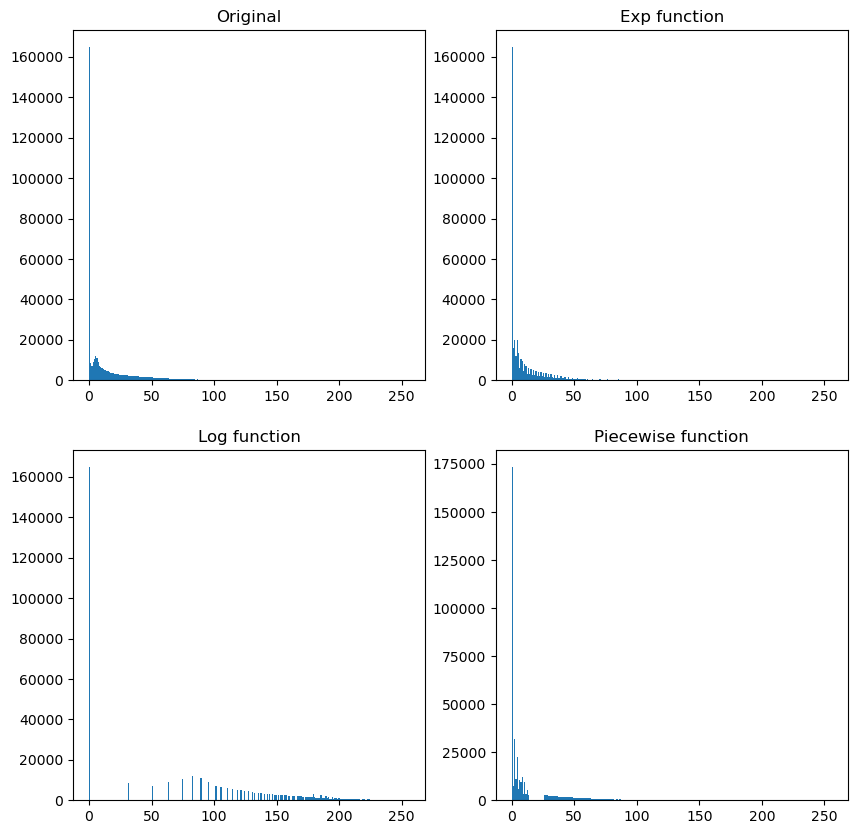

In [12]:
plot_fig(
    figsize=(10, 10), 
    rows=2, 
    cols=2, 
    data_list=(q5_image, output_image7, output_image8, output_image9), 
    title_list=("Original", 'Exp function', 'Log function', 'Piecewise function'), 
    plot_type_list=('hist',)*4
)